#### This is the Cars dataset from Kaggle (https://www.kaggle.com/CooperUnion/cardataset). Features include make, model, year, engine HP, Cylinders, Size, MPG, and other properties of the car used to predict its price. I'd like to explore the effects of HP, and Cylinders on price using Linear regression model. 

In [112]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [113]:
# Cars MSRP and features
# https://www.kaggle.com/CooperUnion/cardataset
cars = pd.read_csv("cardata.csv")
cars.dtypes

Make              object
Model             object
Year               int64
Fuel_Type         object
HP               float64
Cylinders        float64
Transmission      object
Driven_Wheels     object
Doors            float64
Category          object
Size              object
Style             object
highway_MPG        int64
city_mpg           int64
Popularity         int64
MSRP               int64
dtype: object

In [114]:
# Select 2017 data for Compact and Midsize cars for a particular fuel types. 
cars_2017 = cars[(cars.Year == 2017) & 
                 ((cars.Size == 'Compact')  | (cars.Size == 'Midsize')) & 
                 ((cars.Fuel_Type == 'premium unleaded (recommended)') | 
                  (cars.Fuel_Type == 'premium unleaded (required)') | 
                  (cars.Fuel_Type == 'regular unleaded'))]
cars_2017['HP'].replace('', np.nan, inplace=True)
cars_2017.dropna(subset=['HP'], inplace=True)
print(cars_2017.shape)

(1122, 16)


C:\Users\skpan\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\skpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [115]:
type(cars_2017)

pandas.core.frame.DataFrame

In [116]:
import seaborn as sns
sns.set()

In [117]:
# Predictor variables # Engine Cylinders, and Engine HP
X = cars_2017[["Cylinders","HP"]]    
y = cars_2017.MSRP

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
# Split the data into Test and Training sets, with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=9)

In [120]:
X_train.shape, y_train.shape

((785, 2), (785,))

In [121]:
X_test.shape, y_test.shape

((337, 2), (337,))

In [122]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

In [123]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
y_predicted = lrm.predict(X_test)

In [125]:
# Mean squared error with Numpy
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print('MSE with numpy',mean_sq_error)

MSE with numpy 166077686.7722711


In [126]:
# Mean squared error with sklearn metrics
from sklearn.metrics import mean_squared_error


In [127]:
print('lrm test',mean_squared_error(y_true = y_test, y_pred = lrm.predict(X_test)))
print('lrm train',mean_squared_error(y_true = y_train, y_pred = lrm.predict(X_train)))

lrm test 166077686.7722711
lrm train 152667056.51728377


#### Though the Mean squared error values are matching between numpy and sklearn methods, the values are unusally higher. Not sure if it's okay to have a higher error values?? Even with just one predictor variable and different test_size values, MSE values remained higher. 

In [128]:
cars_2017.MSRP.mean()

38435.07575757576

In [129]:
# How much variablility in y can be explained by X
lrm.score(X_test, y_test)

0.6594160714790371

#### About 66% of variability in y, the target varibale, can be explained using test X

In [130]:
lrm.score(X_train, y_train)

0.7094696826110424

#### Whereas about 71% of variability in y_train, the target varibale, can be explained using X_train

(array([  1.,   7., 116., 200.,   6.,   5.,   0.,   1.,   0.,   1.]),
 array([-56098.58085463, -38163.02400913, -20227.46716362,  -2291.91031811,
         15643.64652739,  33579.2033729 ,  51514.7602184 ,  69450.31706391,
         87385.87390942, 105321.43075492, 123256.98760043]),
 <a list of 10 Patch objects>)

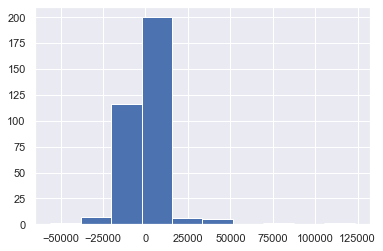

In [131]:
# plot histogram of residuals
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted)

#### Histogram of residuals. Though it doesn't appear to be a perfect, but the residuals have some normal distribution. 

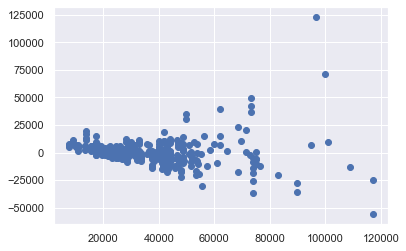

In [132]:
plt.scatter(y_predicted, y_test - y_predicted)

#### Scatterplot of predicted values and residuals. Though scatterplots for predicted and training sets appears to be closely similar, based on the distribution of X values on the plot it doesn't look like the presense of homoscedasticity. 

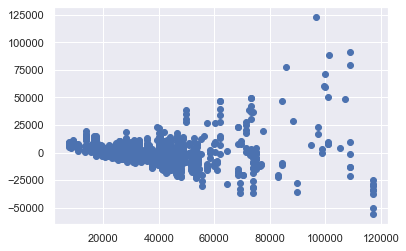

In [133]:
plt.scatter(lrm.predict(X), y - lrm.predict(X))

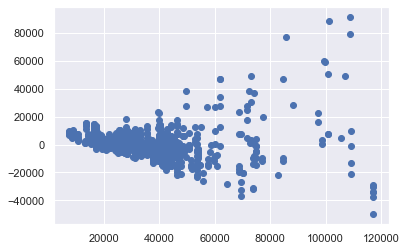

In [134]:
plt.scatter(lrm.predict(X_train), y_train - lrm.predict(X_train))

In [135]:
print(lrm.coef_)

[-3545.77197726   222.84415676]


#### Coefficiants explain how much the MSRP changes for each unit change in #Cylinders, and Engine HP. SO the MSRP changes by
#### 3546, and 223 respectively for each unit change in ##Cylinders, and Engine HP while others factors are being constant. 

In [136]:
print(lrm.intercept_)

756.0547792830548


#### Calculate Mean absolute error

In [137]:
from sklearn.neural_network import MLPRegressor

In [138]:
nn_lm = MLPRegressor(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5,2,2), random_state=1)

In [139]:
nn_lm.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5, 2, 2), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [140]:
y_pred_nn = nn_lm.predict(X_test)

In [141]:
np.mean( (y_test - y_pred_nn) **2 )

165578332.98825955

In [142]:
np.mean( (y_train - nn_lm.predict(X_train)) **2 )

152802060.41184258

In [143]:
from sklearn.metrics import r2_score, mean_absolute_error
mean_absolute_error(y_test, y_pred_nn)

7421.447002806007

In [144]:
mean_absolute_error(y_train, nn_lm.predict(X_train))

7634.831165495387

In [145]:
r2_score(y_test, y_pred_nn)

0.6604401215894751

#### About 66% of variability the target varibale, can be explained by the model and it's same as the value from the other Linear regression model above.